In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv(r'fraud_oracle.csv')

In [56]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [58]:
pd.set_option('display.max_columns', None)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [59]:
df.dtypes

Month                   category
WeekOfMonth                int64
DayOfWeek               category
Make                    category
AccidentArea            category
DayOfWeekClaimed        category
MonthClaimed            category
WeekOfMonthClaimed         int64
Sex                     category
MaritalStatus           category
Age                        int64
Fault                   category
PolicyType              category
VehicleCategory         category
VehiclePrice            category
FraudFound_P               int64
PolicyNumber               int64
RepNumber                  int64
Deductible                 int64
DriverRating               int64
Days_Policy_Accident    category
Days_Policy_Claim       category
PastNumberOfClaims      category
AgeOfVehicle            category
AgeOfPolicyHolder       category
PoliceReportFiled       category
WitnessPresent          category
AgentType               category
NumberOfSuppliments     category
AddressChange_Claim     category
NumberOfCa

In [46]:
int_cols = df.select_dtypes(include='int64').columns

int_cols

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [48]:
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [57]:
for column in ('Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
               'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
               'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
               'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
               'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
               'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
               'NumberOfCars', 'BasePolicy'):
  df[column] = pd.Categorical(df[column])

C:\Users\user\AppData\Local\Temp\ipykernel_18520\1654648135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted = df.groupby(['Make', 'FraudFound_P']).size().unstack()


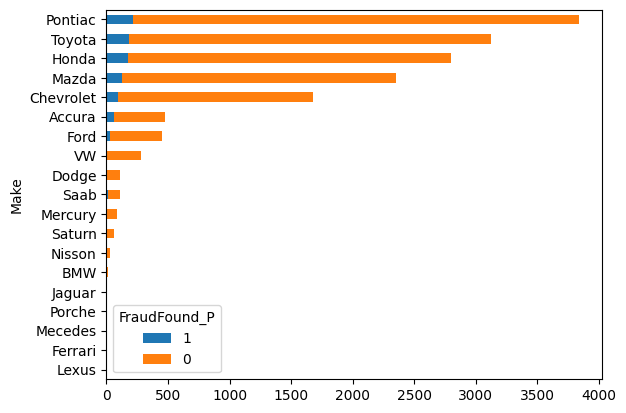

In [61]:
df_sorted = df.groupby(['Make', 'FraudFound_P']).size().unstack()

df_sorted['Total'] = df_sorted[1].fillna(0)+ df_sorted[0]
df_sorted.sort_values('Total', ascending=False, inplace=True)
ax = df_sorted[[1,0]].plot(kind='barh', stacked=True)
ax.invert_yaxis()

In [55]:
pd.crosstab(df.Make,df.FraudFound_P)

FraudFound_P,0,1
Make,,
Accura,413,59
BMW,14,1
Chevrolet,1587,94
Dodge,107,2
Ferrari,2,0
Ford,417,33
Honda,2622,179
Jaguar,6,0
Lexus,1,0


C:\Users\user\AppData\Local\Temp\ipykernel_18520\1879852386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted = df.groupby(['AccidentArea', 'FraudFound_P']).size().unstack()


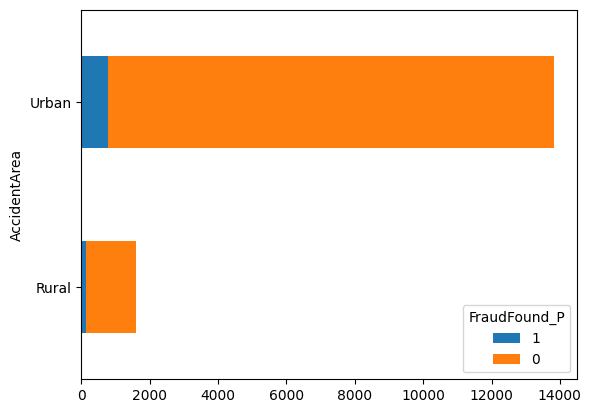

In [63]:
df_sorted = df.groupby(['AccidentArea', 'FraudFound_P']).size().unstack()

df_sorted['Total'] = df_sorted[1].fillna(0)+ df_sorted[0]
df_sorted.sort_values('Total', ascending=False, inplace=True)
ax = df_sorted[[1,0]].plot(kind='barh', stacked=True)
ax.invert_yaxis()

In [65]:
pd.crosstab(df.AccidentArea,df.FraudFound_P)

FraudFound_P,0,1
AccidentArea,,
Rural,1465,133
Urban,13032,790


C:\Users\user\AppData\Local\Temp\ipykernel_18520\3966646170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted = df.groupby(['Sex', 'FraudFound_P']).size().unstack()


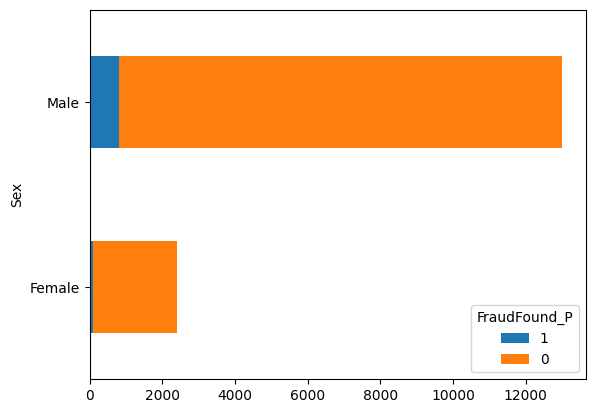

In [66]:
df_sorted = df.groupby(['Sex', 'FraudFound_P']).size().unstack()

df_sorted['Total'] = df_sorted[1].fillna(0)+ df_sorted[0]
df_sorted.sort_values('Total', ascending=False, inplace=True)
ax = df_sorted[[1,0]].plot(kind='barh', stacked=True)
ax.invert_yaxis()

In [67]:
pd.crosstab(df.Sex,df.FraudFound_P)

FraudFound_P,0,1
Sex,,
Female,2315,105
Male,12182,818


C:\Users\user\AppData\Local\Temp\ipykernel_18520\3423275988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted = df.groupby(['MaritalStatus', 'FraudFound_P']).size().unstack()


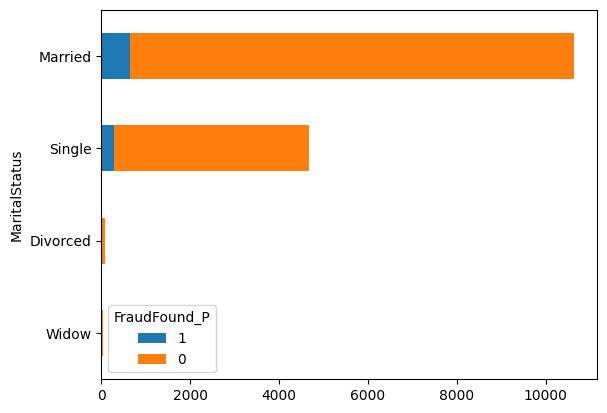

In [68]:
df_sorted = df.groupby(['MaritalStatus', 'FraudFound_P']).size().unstack()

df_sorted['Total'] = df_sorted[1].fillna(0)+ df_sorted[0]
df_sorted.sort_values('Total', ascending=False, inplace=True)
ax = df_sorted[[1,0]].plot(kind='barh', stacked=True)
ax.invert_yaxis()

In [71]:
pd.crosstab(df.MaritalStatus,df.FraudFound_P)

FraudFound_P,0,1
MaritalStatus,,
Divorced,73,3
Married,9986,639
Single,4406,278
Widow,32,3


In [72]:
df.loc[df["Age"] == 0].value_counts().count()

np.int64(320)

There are 319 rows have no age (age=0)

In [74]:
fraud_age_0 = df.loc[(df["Age"] == 0) & (df["FraudFound_P"] == 1)].shape[0]
print(fraud_age_0)

31


So, there are 31 out of 319 rows that are fraud cases for age = 0.

In [75]:
df.loc[df["FraudFound_P"] == 1]["Age"].describe()

count    923.000000
mean      38.265439
std       13.871426
min        0.000000
25%       30.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: Age, dtype: float64

In [76]:
df.loc[df["FraudFound_P"] == 0]["Age"].describe()

count    14497.000000
mean        39.956957
std         13.462013
min          0.000000
25%         31.000000
50%         38.000000
75%         49.000000
max         80.000000
Name: Age, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_18520\3004086873.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_plot, labels=["No Fraud","Fraud"])


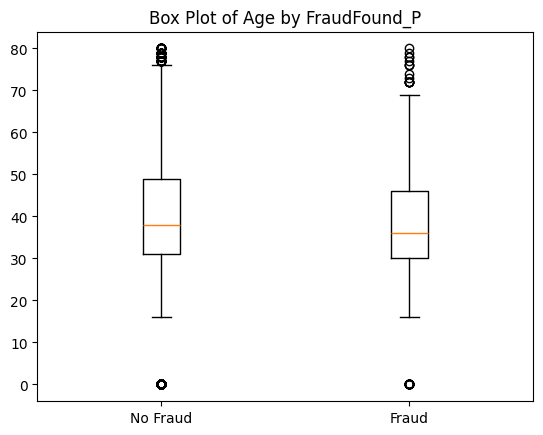

In [77]:
data_plot = [df.loc[df["FraudFound_P"] == 0]["Age"], df.loc[df["FraudFound_P"] == 1]["Age"]]
df_plot = pd.DataFrame(data_plot, columns=['No Fraud', 'Fraud'])

plt.boxplot(data_plot, labels=["No Fraud","Fraud"])
plt.title('Box Plot of Age by FraudFound_P')
plt.show()

As we can see, the average age for Fraud and No Fraud are not significant.

In [79]:
df.loc[df["FraudFound_P"] == 0]["DriverRating"].describe()

count    14497.000000
mean         2.485756
std          1.119184
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: DriverRating, dtype: float64

In [80]:
df.loc[df["FraudFound_P"] == 1]["DriverRating"].describe()

count    923.000000
mean       2.520043
std        1.123781
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: DriverRating, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_18520\3096399224.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_plot, labels=["No Fraud","Fraud"])


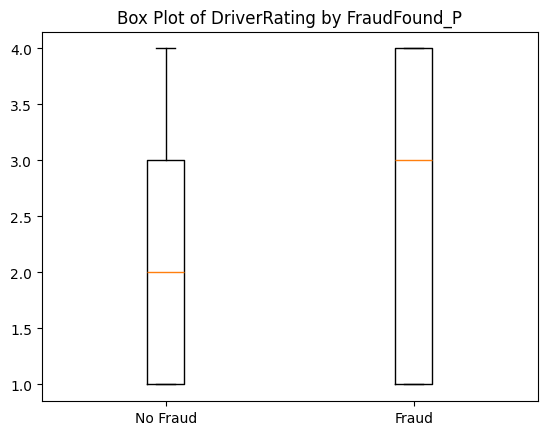

In [81]:
data_plot = [df.loc[df["FraudFound_P"] == 0]["DriverRating"], df.loc[df["FraudFound_P"] == 1]["DriverRating"]]
df_plot = pd.DataFrame(data_plot, columns=['No Fraud', 'Fraud'])

plt.boxplot(data_plot, labels=["No Fraud","Fraud"])
plt.title('Box Plot of DriverRating by FraudFound_P')
plt.show()

The average driver rating for fraud cases is 2.9 and above.